In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read in the public art data and examine the head, tail, and shape

In [3]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [4]:
art.tail(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
130,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,NaN,36.16527,-86.78382,"(36.16527, -86.78382)"
131,Youth Opportunity Center-STARS Nashville - Pea...,Rudloff,Andee,1704 Charlotte Ave.,House paint on vinyl,Mural,NaN,36.15896,-86.79900,"(36.15896, -86.799)"


In [5]:
art.shape

(132, 10)

### Let's explore these additional pandas methods, attributes, and accessors

 - .columns
 - .query()
 - .loc[]
 - .iloc[]
 - [[ ]]
 - .drop()
 - .rename()

#### the `columns` attribute shows the column names for the DataFrame

In [6]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

#### The `iloc[ ]` accessor gets the specified rows and columns by their _index_ values

In [7]:
#art.loc[art.Type == 'Sculpture']
first_five = art.iloc[0:5, 1:3]

In [8]:
first_five

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin
2,Kennedy,Kim
3,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn
4,Ridley,Greg


#### The `loc[ ]` accessor gets the specified rows and columns by their _names_

In [9]:
murals = art.loc[art.Type == 'Mural']
murals.shape

(38, 10)

In [11]:
murals

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.157900,-86.788170,"(36.1579, -86.78817)"
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.162020,-86.799750,"(36.16202, -86.79975)"
5,Aerial Innovations Mural,Rudloff,Andee,202 South 17th St.,House paint on wood,Mural,NaN,36.173540,-86.739940,"(36.17354, -86.73994)"
10,April Baby,Prestwod,Seth,3020 Charlotte Avenue,Acrylic Paint,Mural,portrait of artists little sister with links t...,36.153990,-86.819539,"(36.15399, -86.819539)"
16,Bicycle Bus-Green Fleet,Rudloff,Andee,1st Avenue (under John Seigenthaler Pedestrian...,Metallic paint on metal/found object,Mural,NaN,36.161310,-86.773360,"(36.16131, -86.77336)"
19,Building a Positive Community,"Healing Arts Project, Inc.",Healing Arts Project,East Park Community Center,interior wall paint on board,Mural,"The Healing Arts Project, Inc. sponsored the c...",36.172140,-86.762440,"(36.17214, -86.76244)"
26,Cool Fences,Guion,Scott,"500 East Iris Dr., Nashville, TN",Latex house paint on wood fence,Mural,Portraits of iconic musicians on decorative ba...,36.115540,-86.763660,"(36.11554, -86.76366)"
28,Demonbreun Hill Mural,Deese,Bryan,1524 Demonbreun Street,Latex paint and spray paint,Mural,This piece celebrates Demonbreun Hills former ...,36.153000,-86.790492,"(36.153, -86.790492)"
29,Dragon Wall Mural,Randolf and Glick,Adam and David,21st Avenue and Belcourt Ave.,painting,Mural,NaN,36.137500,-86.801190,"(36.1375, -86.80119)"
30,Eastside Mural,Sterling Goller-Brown. Ian Lawrence,NaN,1008 Forrest Ave,Spray Paint,Mural,NaN,36.178323,-86.750240,"(36.178323, -86.75024)"


#### The `.query( )` method uses an expression to subset the DataFrame

In [12]:
sculptures = art.query('Type == "Sculpture"')
sculptures.shape

(61, 10)

#### Use `@` before the variable name to reference an external object in the query expression

In [13]:
my_list = ['Sculpture', 'Mural']

sculptures_and_murals = art.query("Type in @my_list")
sculptures_and_murals.shape

(99, 10)

In [14]:
artists = art[['Last Name', 'First Name']]
artists.head(2)

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin


#### Drop columns from a DataFrame with the `.drop( )` method; be sure to specify `columns = ` and pass a list of columns to the method

In [15]:
art = art.drop(columns = ['Mapped Location'])

In [16]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude'],
      dtype='object')

In [19]:
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 
                            'First Name': 'first_name','Location': 'loc', 
                            'Medium': 'medium', 'Description': 'desc'})

In [20]:
art.columns

Index(['title', 'last_name', 'first_name', 'loc', 'medium', 'Type', 'desc',
       'Latitude', 'Longitude'],
      dtype='object')

#### If the column list is short and you are feeling lazy, you can assign new column names (as a list _with every column in the right order_) to the columns attribute

In [21]:
art.columns = ['title', 'last', 'first', 'loc', 'med',
              'type', 'desc', 'lat', 'lng']

In [22]:
art.columns

Index(['title', 'last', 'first', 'loc', 'med', 'type', 'desc', 'lat', 'lng'], dtype='object')

### More exploration with pandas
 - .value_counts()
 - .to_frame()
 - .reset_index()
 - .describe()
 - .info()
 - .isnull().sum()

#### Let's remind ourselves of the data 

In [23]:
art.head(2)

,title,last,first,loc,med,type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774


#### `value_counts( )` tallies the number of each value for a column; here we look at the art type column

In [24]:
art.type.value_counts()

Sculpture             61
Mural                 38
Monument              16
Various                2
Mobile                 2
Mosaic                 2
Frieze                 2
mural                  1
Stained Glass          1
Multipart              1
Fountain               1
Bronzes                1
Furniture              1
Relief                 1
Sculpture/Fountain     1
Street Art             1
Name: type, dtype: int64

#### Let's save it into a variable and check the type

In [34]:
type_counts = art.type.value_counts()

In [36]:
type_counts.head()

Sculpture    61
Mural        38
Monument     16
Various       2
Mobile        2
Name: type, dtype: int64

In [37]:
type(type_counts)

pandas.core.series.Series

In [38]:
#make series a df
type_counts = type_counts.to_frame()



In [39]:
type(type_counts)

pandas.core.frame.DataFrame

In [40]:
type_counts.head(2)

,type
Sculpture,61
Mural,38


In [41]:
#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()
type_counts

,index,type
0,Sculpture,61
1,Mural,38
2,Monument,16
3,Various,2
4,Mobile,2
5,Mosaic,2
6,Frieze,2
7,mural,1
8,Stained Glass,1
9,Multipart,1


In [42]:
type_counts.head(2)

,index,type
0,Sculpture,61
1,Mural,38


#### fix columns

In [43]:
type_counts.columns = ['type', 'count']
type_counts.head(3)

,type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


#### check the type again

In [44]:
type(type_counts)

pandas.core.frame.DataFrame

#### the `.info( )` method gets lots of info about the data: 
 - number of rows
 - types for each column
 - size in memory
 - missingness

In [45]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
title    132 non-null object
last     132 non-null object
first    122 non-null object
loc      131 non-null object
med      128 non-null object
type     132 non-null object
desc     87 non-null object
lat      132 non-null float64
lng      132 non-null float64
dtypes: float64(2), object(7)
memory usage: 9.4+ KB


#### The `.describe( )` method gives statistical info for the quantitative data 
- count
- mean
- standard deviation
- minimum
- maximum
- quartiles


In [46]:
type_counts.describe()

,count
count,16.000000
mean,8.250000
std,17.043083
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,61.000000


#### You can also check null values by chaining the `isnull( )` and `sum( )` methods together; this sums up the number of cases where a value is null (the is null boolean returns a 1 when True)

In [47]:
art.isnull().sum()

title     0
last      0
first    10
loc       1
med       4
type      0
desc     45
lat       0
lng       0
dtype: int64

#### matplotlib - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot


### Simplest horizontal barplot using matplotlib.pyplot

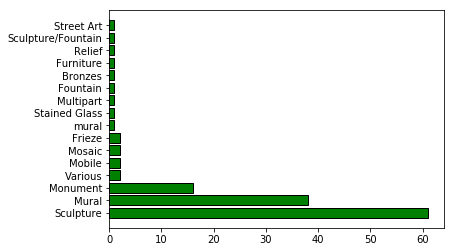

In [49]:
plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

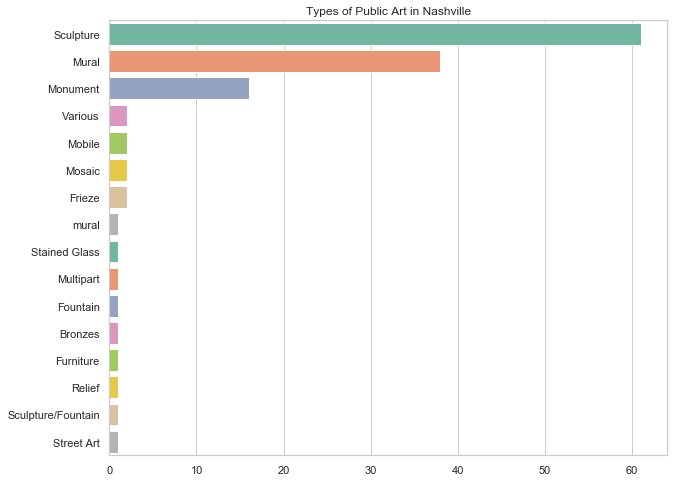

In [54]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot('count', 'type', data = type_counts, palette = 'Set2')
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');